## TensorFlow - Regression
In this notebook we use an ANN (Artificial Neural Network) to learn a non linear function.

In [1]:
#import stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
#lets make a synthetic dataset
X = np.linspace(0,2*np.pi,10000)
y = np.sin(X) + np.cos(3*X)

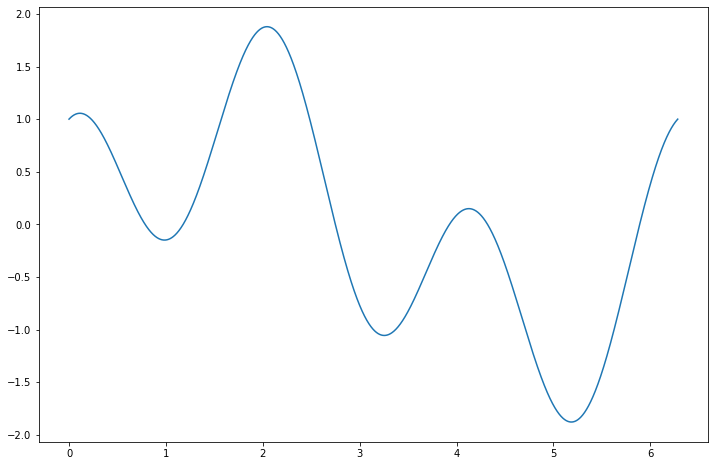

In [3]:
plt.figure(figsize=(12,8))
plt.plot(X,y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
len(X_train)

8000

In [6]:
len(X_test)

2000

In [7]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(1,)),                                 
    tf.keras.layers.Dense(128, activation='sigmoid' ),
    tf.keras.layers.Dense(1)  
])

In [8]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.7403 - val_loss: 0.7499
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.7283 - val_loss: 0.7286
Epoch 3/200
250/250 [==============================] - 0s 2ms/step - loss: 0.6852 - val_loss: 0.6347
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.6152 - val_loss: 0.5453
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.5172 - val_loss: 0.4506
Epoch 6/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4426 - val_loss: 0.4338
Epoch 7/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4057 - val_loss: 0.3855
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3769 - val_loss: 0.3497
Epoch 9/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3592 - val_loss: 0.3354
Epoch 10/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3539 - val_lo

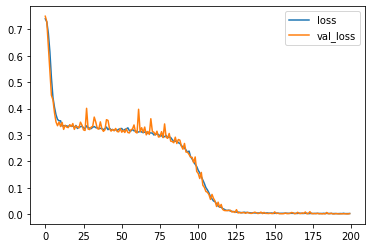

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [10]:
#Make the prediction
sortNdx = np.argsort(X_test)
X_test = X_test[sortNdx]
y_test = y_test[sortNdx]
y_predict = model.predict(X_test)

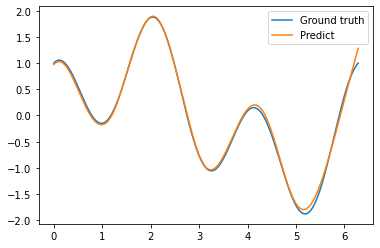

In [11]:
plt.plot(X_test, y_test, label='Ground truth')
plt.plot(X_test, y_predict, label='Predict')
plt.legend()

We see a very good fit of the data using ANN.